In [24]:
#Build a horses-or-humans classifier that will tell if a given image contains a horse or a human,
# where the network is trained to recognize features that determine which is which.
# have to do some processing of the data before can be trained.

In [25]:
# Data Downloading:
!wget \
  https://storage.googleapis.com/learning-datasets/horse-or-human.zip \
  -O /tmp/horse-or-human.zip

--2024-02-12 20:42:09--  https://storage.googleapis.com/learning-datasets/horse-or-human.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 172.253.122.207, 172.253.63.207, 142.250.31.207, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|172.253.122.207|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 149574867 (143M) [application/zip]
Saving to: ‘/tmp/horse-or-human.zip’

/tmp/horse-or-human 100%[===================>] 142.65M   175MB/s    in 0.8s    

2024-02-12 20:42:10 (175 MB/s) - ‘/tmp/horse-or-human.zip’ saved [149574867/149574867]



In [26]:
# The following Python code will use the OS library to use operating system libraries,
# giving you access to the file system and the zip file library, therefore allowing to unzip the data.
# The contents of the zip file are extracted to the base directory /tmp/horse-or-human, which contain horses and human subdirectories.
# In short, the training set is the data that is used to tell the neural network model
# that "this is what a horse looks like" and "this is what a human looks like."

In [27]:
# Data Acquiring
import os
import zipfile

local_zip = '/tmp/horse-or-human.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('/tmp/horse-or-human')
zip_ref.close()

In [28]:
# Use the ImageGenerator to label and prepare the data
# ImageDataGenerator being used, which reads images from subdirectories and automatically labels them from the name of that subdirectory.
# For example, you have a training directory containing a horses directory and a humans directory.
# ImageDataGenerator will label the images appropriately , reducing a coding step.

## Define each of those directories:

# Directory with our training horse pictures
train_horse_dir = os.path.join('/tmp/horse-or-human/horses')

# Directory with our training human pictures
train_human_dir = os.path.join('/tmp/horse-or-human/humans')


In [29]:
# The filenames look like in the horses and humans training directories:
train_horse_names = os.listdir(train_horse_dir)
print(train_horse_names[:10])
train_human_names = os.listdir(train_human_dir)
print(train_human_names[:10])

['horse17-2.png', 'horse14-8.png', 'horse23-6.png', 'horse20-9.png', 'horse36-6.png', 'horse18-9.png', 'horse37-3.png', 'horse16-0.png', 'horse04-0.png', 'horse41-5.png']
['human09-23.png', 'human16-07.png', 'human09-30.png', 'human08-16.png', 'human04-20.png', 'human15-18.png', 'human17-16.png', 'human14-26.png', 'human06-27.png', 'human15-25.png']


In [30]:
# The total number of horse and human images in the directories:
print('total training horse images:', len(os.listdir(train_horse_dir)))
print('total training human images:', len(os.listdir(train_human_dir)))


total training horse images: 500
total training human images: 527


In [31]:
# Explore the data:
# Configure the matplot parameters:
%matplotlib inline

import matplotlib.pyplot as plt
import matplotlib.image as mpimg

# Parameters for our graph; we'll output images in a 4x4 configuration
nrows = 4
ncols = 4

# Index for iterating over images
pic_index = 0

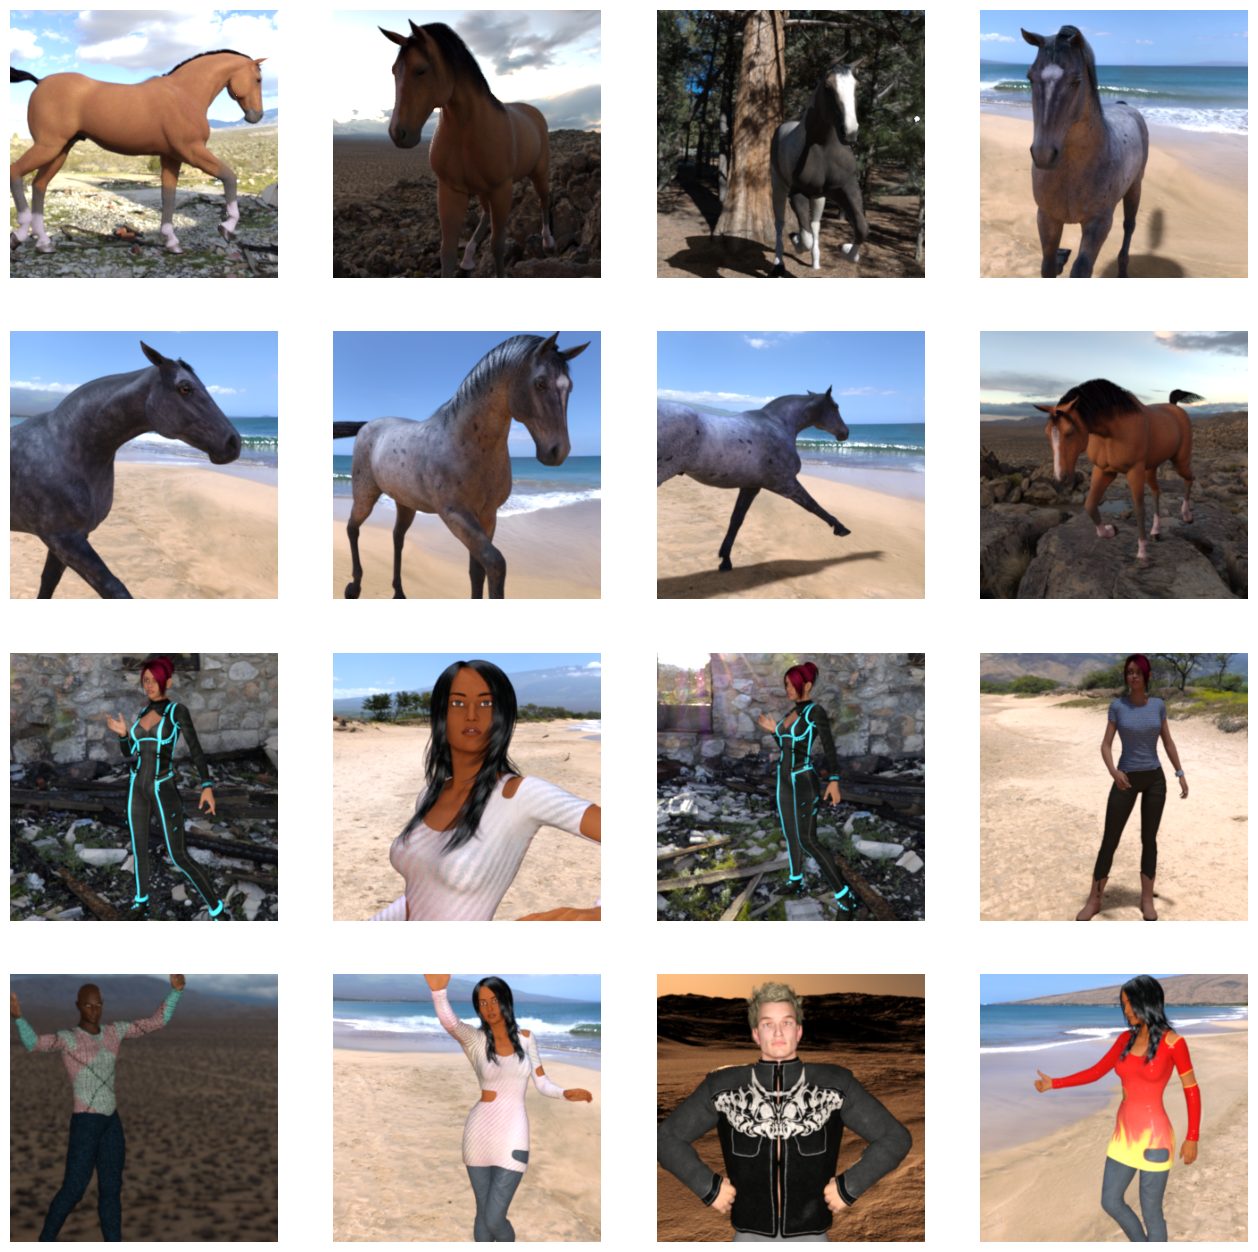

In [32]:
# Display a batch of eight horse pictures and eight human pictures.
# One can rerun the cell to see a fresh batch each time.
# Set up matplotlib fig, and size it to fit 4x4 pics
fig = plt.gcf()
fig.set_size_inches(ncols * 4, nrows * 4)

pic_index += 8
next_horse_pix = [os.path.join(train_horse_dir, fname)
                for fname in train_horse_names[pic_index-8:pic_index]]
next_human_pix = [os.path.join(train_human_dir, fname)
                for fname in train_human_names[pic_index-8:pic_index]]

for i, img_path in enumerate(next_horse_pix+next_human_pix):
  # Set up subplot; subplot indices start at 1
  sp = plt.subplot(nrows, ncols, i + 1)
  sp.axis('Off') # Don't show axes (or gridlines)

  img = mpimg.imread(img_path)
  plt.imshow(img)

plt.show()

In [33]:
# Define the model:
import tensorflow as tf
# Then, add convolutional layers and flatten the final result to feed into the densely connected layers.
# Finally, add the densely connected layers.

# Note that because you're facing a two-class classification problem (a binary classification problem)
# you'll end your network with a sigmoid activation so that the output of your network will be a single scalar between 0 and 1,
# encoding the probability that the current image is class 1 (as opposed to class 0).
model = tf.keras.models.Sequential([
    # Note the input shape is the desired size of the image 300x300 with 3 bytes color
    # This is the first convolution
    tf.keras.layers.Conv2D(16, (3,3), activation='relu', input_shape=(300, 300, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),
    # The second convolution
    tf.keras.layers.Conv2D(32, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    # The third convolution
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    # The fourth convolution
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    # The fifth convolution
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    # Flatten the results to feed into a DNN
    tf.keras.layers.Flatten(),
    # 512 neuron hidden layer
    tf.keras.layers.Dense(512, activation='relu'),
    # Only 1 output neuron. It will contain a value from 0-1 where 0 for 1 class ('horses') and 1 for the other ('humans')
    tf.keras.layers.Dense(1, activation='sigmoid')
])

In [34]:
model.summary()


Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_5 (Conv2D)           (None, 298, 298, 16)      448       
                                                                 
 max_pooling2d_5 (MaxPoolin  (None, 149, 149, 16)      0         
 g2D)                                                            
                                                                 
 conv2d_6 (Conv2D)           (None, 147, 147, 32)      4640      
                                                                 
 max_pooling2d_6 (MaxPoolin  (None, 73, 73, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_7 (Conv2D)           (None, 71, 71, 64)        18496     
                                                                 
 max_pooling2d_7 (MaxPoolin  (None, 35, 35, 64)       

In [35]:
# The output shape column shows how the size of your feature map evolves in each successive layer.
# The convolution layers reduce the size of the feature maps by a bit due to padding and each pooling layer halves the dimensions.

In [36]:
# Compile the model:
# Next, configure the specifications for model training.
# Train the model with the binary_crossentropy loss because it's a binary classification problem, here final activation is a sigmoid.
# Use the rmsprop optimizer with a learning rate of 0.001. During training, monitor classification accuracy.
from tensorflow.keras.optimizers import RMSprop

model.compile(loss='binary_crossentropy',
              optimizer=RMSprop(lr=0.001),
              metrics=['acc'])


In [37]:
# Train the model from generators:
# Set up data generators that read pictures in my source folders,
# convert them to float32 tensors, and feed them (with their labels) to my network.

# I will have one generator for the training images and one for the validation images.
# My generators will yield batches of images of size 300x300 and their labels (binary).

# As I have already knew, data that goes into neural networks should usually be normalized in some way
# to make it more amenable to processing by the network. (It's uncommon to feed raw pixels into a CNN.)
# In my case, I will preprocess your images by normalizing the pixel values to be in the [0, 1] range
## (originally all values are in the [0, 255] range).

# In Keras, that can be done via the keras.preprocessing.image.ImageDataGenerator class using the rescale parameter.
# That ImageDataGenerator class allows me to instantiate generators of augmented image batches
# and their labels via .flow(data, labels) or .flow_from_directory(directory).
# Those generators can then be used with the Keras model methods that accept data generators as inputs:
## fit_generator, evaluate_generator and predict_generator.

In [38]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# All images will be rescaled by 1./255
train_datagen = ImageDataGenerator(rescale=1./255)

# Flow training images in batches of 128 using train_datagen generator
train_generator = train_datagen.flow_from_directory(
        '/tmp/horse-or-human/',  # This is the source directory for training images
        target_size=(300, 300),  # All images will be resized to 150x150
        batch_size=128,
        # Since we use binary_crossentropy loss, we need binary labels
        class_mode='binary')

Found 1027 images belonging to 2 classes.


In [39]:
# Do the training:
# Train for 15 epochs. (That may take a few minutes to run.)
history = model.fit(
      train_generator,
      steps_per_epoch=8,
      epochs=15,
      verbose=1)

Epoch 1/15
8/8 [==============================] - 91s 10s/step - loss: 0.7112 - acc: 0.5161
Epoch 2/15
8/8 [==============================] - 80s 10s/step - loss: 0.6532 - acc: 0.7453
Epoch 3/15
8/8 [==============================] - 82s 10s/step - loss: 0.7985 - acc: 0.5829
Epoch 4/15
8/8 [==============================] - 96s 11s/step - loss: 0.5026 - acc: 0.8154
Epoch 5/15
8/8 [==============================] - 95s 11s/step - loss: 0.5441 - acc: 0.7953
Epoch 6/15
8/8 [==============================] - 81s 10s/step - loss: 0.3404 - acc: 0.8743
Epoch 7/15
8/8 [==============================] - 92s 11s/step - loss: 0.1919 - acc: 0.9310
Epoch 8/15
8/8 [==============================] - 83s 10s/step - loss: 0.1348 - acc: 0.9410
Epoch 9/15
8/8 [==============================] - 82s 12s/step - loss: 0.3912 - acc: 0.8676
Epoch 10/15
8/8 [==============================] - 82s 12s/step - loss: 0.1030 - acc: 0.9588
Epoch 11/15
8/8 [==============================] - 81s 10s/step - loss: 0.0857 

In [40]:
# Note the values per epoch:

# The Loss and Accuracy are a great indication of progress of training.
# It is making a guess as to the classification of the training data, and
# then measuring it against the known label, calculating the result.
# Accuracy is the portion of correct guesses.

In [41]:
# Test the model:

# Now actually run a prediction using the model.
# The code will allow you to choose one or more files from your file system.
# It will then upload them and run them through the model,
# giving an indication of whether the object is a horse or a human.

# You can download images from the internet to your file system to try them out!
# Note that you might see that the network makes a lot of mistakes despite the fact that the training accuracy is above 99%.

# That's due to something called overfitting, which means that the neural network is trained with very limited data
 # (there are only roughly 500 images of each class).
 # So it's very good at recognizing images that look like those in the training set,
 # but it can fail a lot at images that are not in the training set.

# That's a datapoint proving that the more data that you train on, the better your final network will be!

# There are many techniques that can be used to make your training better,
# despite limited data, including something called image augmentation, but that's beyond the scope of this codelab.

In [49]:
import numpy as np
from google.colab import files
from keras.preprocessing import image

uploaded = files.upload()

for fn in uploaded.keys():

  # predicting images
  path = '/content/' + fn
  img = image.load_img(path, target_size=(300, 300))
  x = image.img_to_array(img)
  x = np.expand_dims(x, axis=0)

  images = np.vstack([x])
  classes = model.predict(images, batch_size=10)
  print(classes[0])
  if classes[0]>0.5:
    print(fn + " is a human")
  else:
    print(fn + " is a horse")

Saving Screenshot 2024-02-13 at 02.43.47.png to Screenshot 2024-02-13 at 02.43.47 (4).png
Saving 69095266_2489484718002993_6091186803874794324_n.jpeg to 69095266_2489484718002993_6091186803874794324_n (3).jpeg
1/1 [==============================] - 0s 43ms/step
[0.]
Screenshot 2024-02-13 at 02.43.47 (4).png is a horse
1/1 [==============================] - 0s 42ms/step
[1.]
69095266_2489484718002993_6091186803874794324_n (3).jpeg is a human


In [50]:
# Visualize intermediate representations:
# To get a feel for what kind of features your CNN has learned,
# a fun thing to do is visualize how an input gets transformed as it goes through the CNN.

# Pick a random image from the training set,
# then generate a figure where each row is the output of a layer and
# each image in the row is a specific filter in that output feature map.
# Rerun that cell to generate intermediate representations for a variety of training images.

1/1 [==============================] - 0s 137ms/step


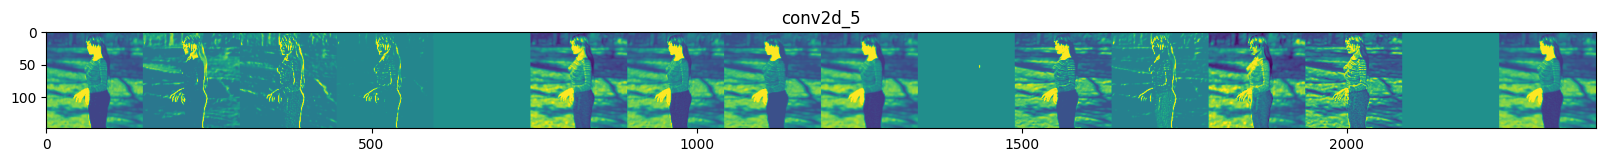

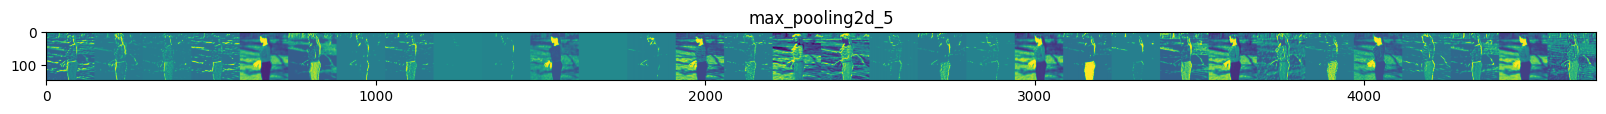

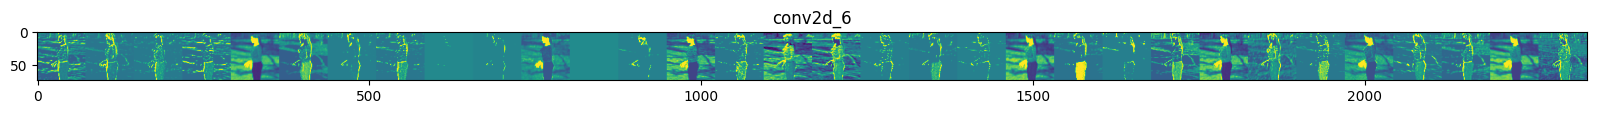

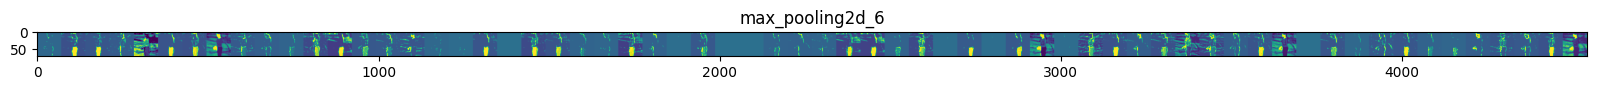

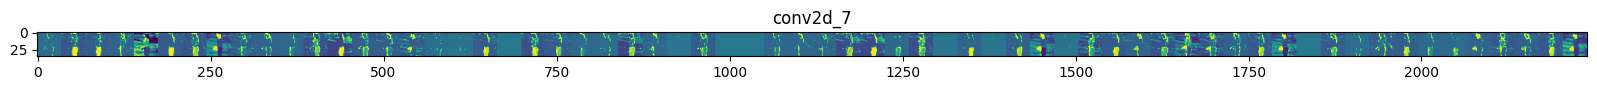

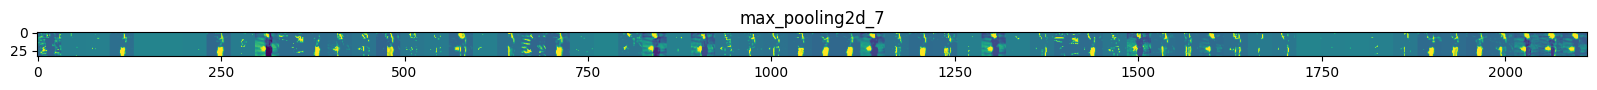

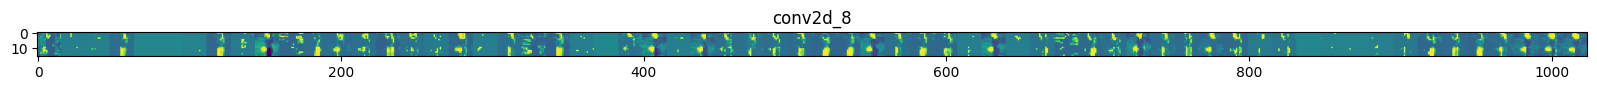

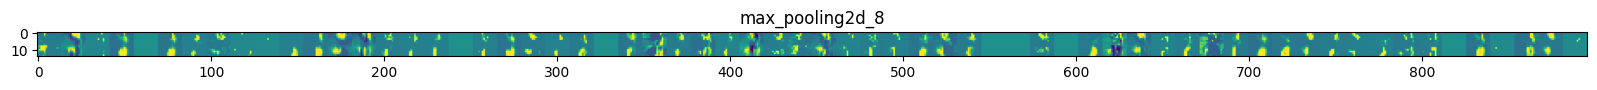

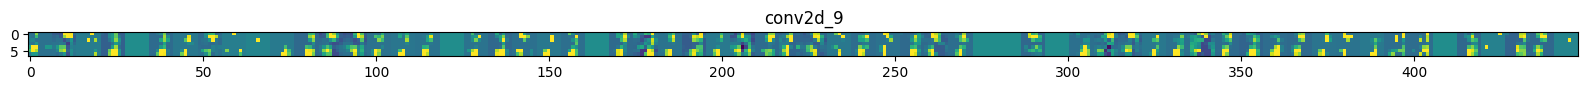

In [51]:
import numpy as np
import random
from tensorflow.keras.preprocessing.image import img_to_array, load_img

# Let's define a new Model that will take an image as input, and will output
# intermediate representations for all layers in the previous model after
# the first.
successive_outputs = [layer.output for layer in model.layers[1:]]
#visualization_model = Model(img_input, successive_outputs)
visualization_model = tf.keras.models.Model(inputs = model.input, outputs = successive_outputs)
# Let's prepare a random input image from the training set.
horse_img_files = [os.path.join(train_horse_dir, f) for f in train_horse_names]
human_img_files = [os.path.join(train_human_dir, f) for f in train_human_names]
img_path = random.choice(horse_img_files + human_img_files)

img = load_img(img_path, target_size=(300, 300))  # this is a PIL image
x = img_to_array(img)  # Numpy array with shape (150, 150, 3)
x = x.reshape((1,) + x.shape)  # Numpy array with shape (1, 150, 150, 3)

# Rescale by 1/255
x /= 255

# Let's run our image through our network, thus obtaining all
# intermediate representations for this image.
successive_feature_maps = visualization_model.predict(x)

# These are the names of the layers, so can have them as part of our plot
layer_names = [layer.name for layer in model.layers]

# Now let's display our representations
for layer_name, feature_map in zip(layer_names, successive_feature_maps):
  if len(feature_map.shape) == 4:
    # Just do this for the conv / maxpool layers, not the fully-connected layers
    n_features = feature_map.shape[-1]  # number of features in feature map
    # The feature map has shape (1, size, size, n_features)
    size = feature_map.shape[1]
    # We will tile our images in this matrix
    display_grid = np.zeros((size, size * n_features))
    for i in range(n_features):
      # Postprocess the feature to make it visually palatable
      x = feature_map[0, :, :, i]
      x -= x.mean()
      if x.std()>0:
        x /= x.std()
      x *= 64
      x += 128
      x = np.clip(x, 0, 255).astype('uint8')
      # We'll tile each filter into this big horizontal grid
      display_grid[:, i * size : (i + 1) * size] = x
    # Display the grid
    scale = 20. / n_features
    plt.figure(figsize=(scale * n_features, scale))
    plt.title(layer_name)
    plt.grid(False)
    plt.imshow(display_grid, aspect='auto', cmap='viridis')

In [52]:
# As you can see, you go from the raw pixels of the images to increasingly abstract and compact representations.
# The representations downstream start highlighting what the network pays attention to,
# and they show fewer and fewer features being "activated." Most are set to zero.
# That's called sparsity. Representation sparsity is a key feature of deep learning.

# Those representations carry increasingly less information about the original pixels of the image,
# but increasingly refined information about the class of the image.
# You can think of a CNN (or a deep network in general) as an information distillation pipeline.